<a href="https://colab.research.google.com/github/brenobraguim/ApiNetCore/blob/master/ProjetoThieneImbecil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas

In [2]:
import pandas as pd
import numpy as np

Lendo a base pra dentro do código

In [27]:
df=pd.read_csv("TourdeFrance.csv")

Verificando quais dados estão sem informação

In [28]:
df.info
df.isnull().sum()

edition           0
start_date        0
winner_name       0
winner_team       0
distance          0
time_overall      8
time_margin       8
stage_wins        0
stages_led        0
height           40
weight           39
age               0
born              0
died             50
full_name        60
nickname         32
birth_town        0
birth_country     0
nationality       0
dtype: int64

In [29]:
df=df.replace(" ",np.nan)

In [30]:
df=df.dropna()

In [31]:
df.isnull().sum()

edition          0
start_date       0
winner_name      0
winner_team      0
distance         0
time_overall     0
time_margin      0
stage_wins       0
stages_led       0
height           0
weight           0
age              0
born             0
died             0
full_name        0
nickname         0
birth_town       0
birth_country    0
nationality      0
dtype: int64

In [32]:
df.head(10)

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
35,36,1949-06-30,Fausto Coppi,Italy,4808.0,149.680278,0.169444,3,5,1.77,68.0,29,1919-09-15,1960-01-02,Angelo Fausto Coppi,"The Heron,Il Campionissimo\r\n(Champion of Cha...",Castellania,Italy,Italy
38,39,1952-06-25,Fausto Coppi,Italy,4898.0,151.955556,0.474444,5,14,1.77,68.0,30,1919-09-15,1960-01-02,Angelo Fausto Coppi,"The Heron,Il Campionissimo\r\n(Champion of Cha...",Castellania,Italy,Italy
69,70,1983-07-01,Laurent Fignon,Renault–Elf,3809.0,105.131111,0.067778,1,6,1.74,67.0,22,1960-08-12,2010-08-31,Laurent Patrick Fignon,Le Professeur (The Professor),Paris,France,France
70,71,1984-06-29,Laurent Fignon,Renault–Elf,4021.0,112.061111,0.169444,5,7,1.74,67.0,23,1960-08-12,2010-08-31,Laurent Patrick Fignon,Le Professeur (The Professor),Paris,France,France


In [33]:
df.dtypes

edition            int64
start_date        object
winner_name       object
winner_team       object
distance         float64
time_overall     float64
time_margin      float64
stage_wins         int64
stages_led         int64
height           float64
weight           float64
age                int64
born              object
died              object
full_name         object
nickname          object
birth_town        object
birth_country     object
nationality       object
dtype: object

In [34]:
df=df.set_index("start_date")

In [35]:
df.head(10)

,edition,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
start_date,,,,,,,,,,,,,,,,,,
1949-06-30,36,Fausto Coppi,Italy,4808.0,149.680278,0.169444,3,5,1.77,68.0,29,1919-09-15,1960-01-02,Angelo Fausto Coppi,"The Heron,Il Campionissimo\r\n(Champion of Cha...",Castellania,Italy,Italy
1952-06-25,39,Fausto Coppi,Italy,4898.0,151.955556,0.474444,5,14,1.77,68.0,30,1919-09-15,1960-01-02,Angelo Fausto Coppi,"The Heron,Il Campionissimo\r\n(Champion of Cha...",Castellania,Italy,Italy
1983-07-01,70,Laurent Fignon,Renault–Elf,3809.0,105.131111,0.067778,1,6,1.74,67.0,22,1960-08-12,2010-08-31,Laurent Patrick Fignon,Le Professeur (The Professor),Paris,France,France
1984-06-29,71,Laurent Fignon,Renault–Elf,4021.0,112.061111,0.169444,5,7,1.74,67.0,23,1960-08-12,2010-08-31,Laurent Patrick Fignon,Le Professeur (The Professor),Paris,France,France


In [13]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"]=14
matplotlib.rcParams["figure.figsize"]=(9,5)
matplotlib.rcParams["figure.facecolor"]="#00000000"

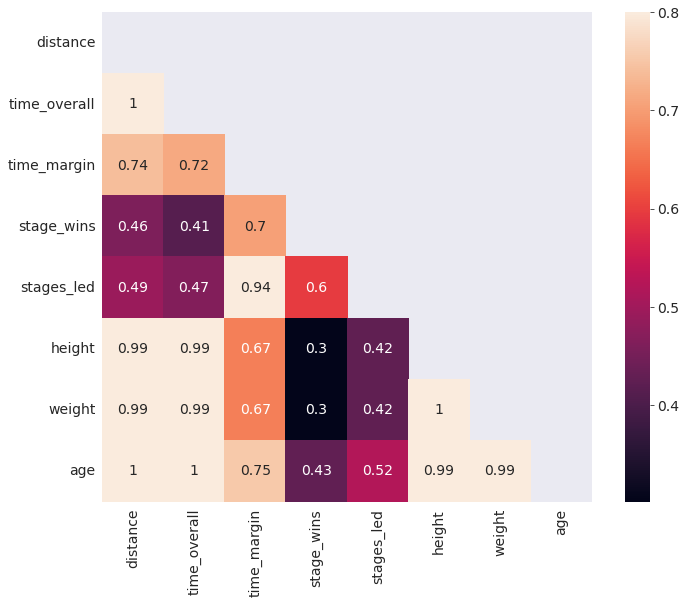

In [14]:
raw_data=["winner_name","winner_team","distance","time_overall","time_margin","stage_wins","stages_led","height","weight","age",
          "born","died","birth_town","birth_country","nationality"]
corrmat=df[raw_data].corr()
fig=plt.figure(figsize=(12,9))
mask=np.triu(np.ones_like(corrmat,dtype=bool))
sns.heatmap(corrmat,vmax=.8,mask=mask,square=True,annot=True)
plt.show()

Text(0.5, 0.98, 'Comparações')

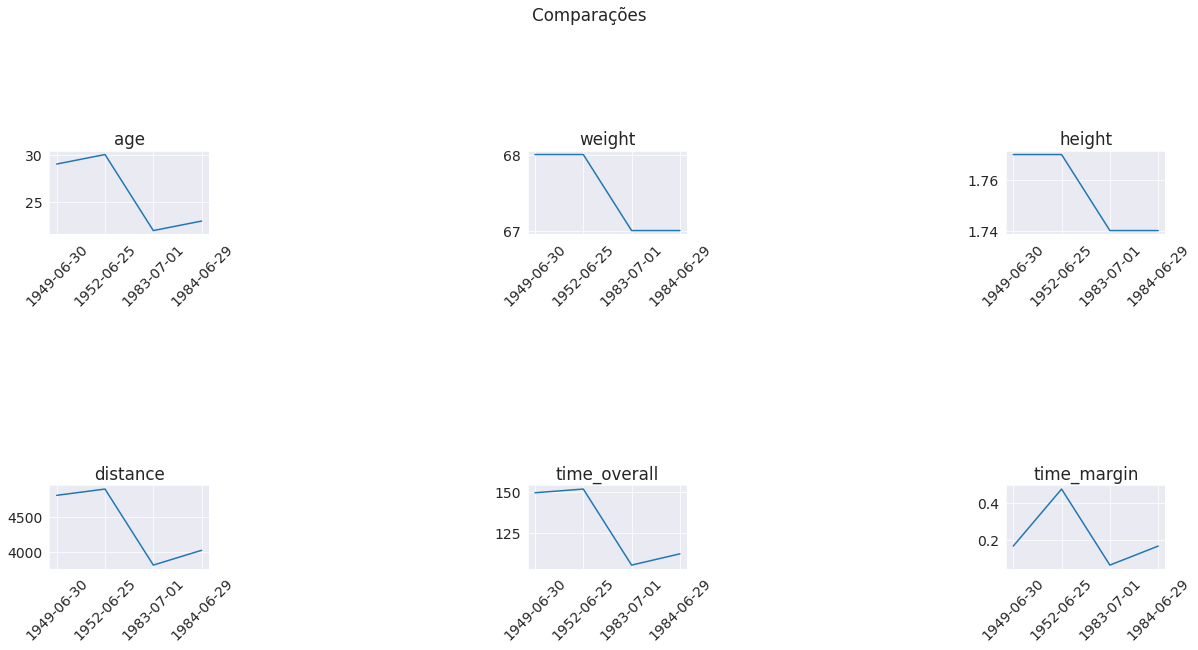

In [38]:
plt.figure(figsize=(20,20))
lst = ['age','weight','height','distance','time_overall','time_margin']
for i in range(len(lst)):
  plt.subplot(4,3,i+1)
  plt.subplots_adjust(hspace=3, wspace=2)
  plt.title(lst[i])
  plt.plot(df[lst[i]])
  plt.xticks(rotation=45)
plt.suptitle('Comparações')